## This Person Might Exist - Demo Notebook

### Generating one sample

Create an instance of `PersonGenerator` and call the class method `generate_person()`to get a random sample.

In [1]:
from main import PersonGenerator, value_mapper

pg = PersonGenerator(anonymize=False)
pg.generate_person()[:4]

(45, 'Irina Schäfer', 'irinaschäfer1@outlook.com', 'mnbvcxz99')

The first four values defaults to Age, Name, Email and Password.

### Generating multiple samples

With a list comprehension we can generate multiple samples. We then call the `value_mapper` to get the correct labels for additional rows, such as Gender, Martial Status, Education, Occupation and so on.

In [2]:
from main import value_mapper

multiple_samples = [pg.generate_person() for n in range(3)]
value_mapper(multiple_samples)

,Age,Name,Email,Password,Phone,Gender,Marital Status,Education,Occupation,Accommodation,Living with,Everyday satisfaction,Health
0,42,Synne Nordström,synnenordström5@outlook.com,snowball29,0725758462,Female,Single,High school diploma,Employed,"Townhouse, cottage, or similar",Family (Partner and children/parents and sibli...,3,3
1,43,Birgitta Koch,birkoch3@icloud.com,kelly19,0792794153,Female,Single,Folk high school/Vocational education,Employed,Rental apartment,Spouse/partner,2,4
2,59,Marie Anderson,marieanderson2@outlook.com,adidas59,0765198248,Female,Widow/Widower not remarried,Elementary school level or lower,Employed,Condominium,Living alone,3,4


`value_mapper` defaults to English column names and row values, but can be changed to Swedish:

In [3]:
value_mapper(multiple_samples, language="swedish")

,Ålder,Namn,Email,Lösenord,Telefon,Kön,Civilstånd,Utbildningsnivå,Sysselsättning,Boende,Tillsammans_med,Vardagstillfredsställelse,Hälsa
0,42,Synne Nordström,synnenordström5@outlook.com,snowball29,0725758462,Kvinna,Ogift,Studentexamen,Arbete,"Radhus, villa eller liknande",Familj (Partner och barn/ föräldrar och syskon),3,3
1,43,Birgitta Koch,birkoch3@icloud.com,kelly19,0792794153,Kvinna,Ogift,Fölkhögskola/Yrkesutbildning,Arbete,Hyresrätt,Make/maka/sambo,2,4
2,59,Marie Anderson,marieanderson2@outlook.com,adidas59,0765198248,Kvinna,Änka/Änkling ej omgift,Folkskolenivå eller lägre,Arbete,Bostadrätt,Ensamboende,3,4


To add other languages, edit the `TranslationMap` in `mapping.py`.

## Custom email generation

In [4]:
from _email import gen_email

Simply calling the `gen_email()` will generate a random email with default values.

In [5]:
gen_email()

'konstantin-ali@gmail.com'

We can set additional parameters. Check out `_email.py` for details.

In [6]:
gen_email(millenial_mail_p=1, age=30)

'hunter-boy94@live.se'

### Let's generate 1024 samples and check if we can find some normal distributions.

In [7]:
person_list = [pg.generate_person() for n in range(1024)]
df = value_mapper(person_list)

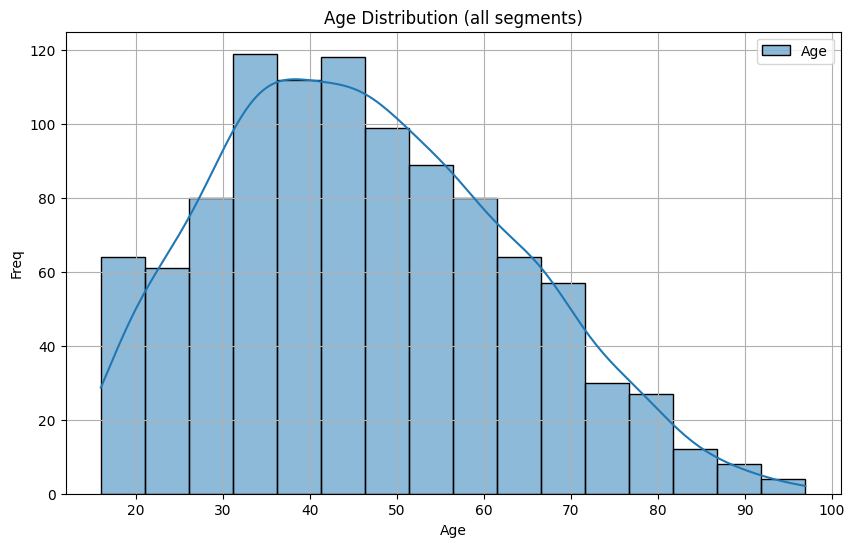

In [8]:
from utils.plots import get_histogram
get_histogram(df['Age'], 'Age Distribution (all segments)', 'Age', 'Freq', bins=16)

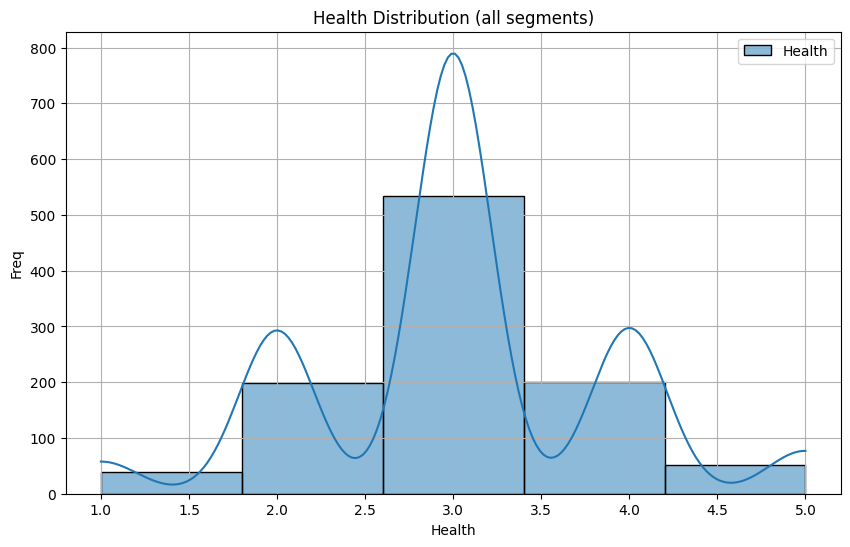

In [9]:
get_histogram(df['Health'], 'Health Distribution (all segments)', 'Health', 'Freq', bins=5)

## Creating custom datasets

We can create custom distributions by